In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math
from bnlp import NLTKTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df_train = pd.read_excel('F:/Context_Aware_Data_Cleaning_Deep/SENTNOB/Dataset/sentnob_clean_train.xlsx')
df_val = pd.read_excel('F:/Context_Aware_Data_Cleaning_Deep/SENTNOB/Dataset/sentnob_clean_val.xlsx')

In [3]:
df_train

,Text,Label
0,মুগ্ধ হয়ে গেলাম মামু. আর তোমায় কি কমু. বলো তোম...,1
1,এই কুত্তার বাচ্চাদের জন্য দেশটা আজ এমন অবস্তা...,2
2,ভাই আপনার কথাই যাদু রয়েছে,1
3,উওরটা আমার অনেক ভালো লেগেছে,1
4,আমার নিজের আমার নিয়ে কি সাজেক যেতে অনেক না? প...,0
...,...,...
12570,বর্ডারে অনেক লেট হয়ে যাওয়াতে আমরা জিপে করে চল...,1
12571,আমার সোনার বাংলা এমন রক্ষক নামের পৌঁছানো কোনো...,2
12572,""" ওনারা এত এত ও এত সুন্দর পরিবেশে রান্না করে ...",1
12573,বাংলাদেশ আমরা পুলিশ চাই না এই ধরনে পুলিশ দরকা...,2


In [4]:
df_train.groupby("Label").describe()

Text                                                               
      count unique                                                top freq
Label                                                                     
0      2894   2788   " আমি বলতাম , পানিতে না নেমে , স্বপ্নে সাঁতার...    3
1      5133   4902   ফাহিম ভাই শশুর বাড়ি গেলে শুধু মাছ বাড়ি দেয় না...    3
2      4548   4282   এইখানে ভালো ছেলেরা পড়াশোনা করে কিভাবে। এটা সা...    3

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import LabelBinarizer

In [6]:
df_train['Label'] = df_train['Label'].replace({0: 'Neutral', 1: 'Positive', 2: 'Negative'})
df_val['Label'] = df_val['Label'].replace({0: 'Neutral', 1: 'Positive', 2: 'Negative'})

In [7]:
count_vect = CountVectorizer() # for converting text into count-based vectors
tfidf_transformer = TfidfTransformer() # for converting text into tf-idf-based vectors
lb = LabelBinarizer() # object for making class-labels into binary numbers

In [8]:
df_train.columns

Index(['Text', 'Label'], dtype='object')

In [9]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df_train["classes_bin"] = lb_make.fit_transform(df_train["Label"])
df_val["classes_bin"] = lb_make.fit_transform(df_val["Label"])
df_train[["classes_bin", "Label"]].head(11)

,classes_bin,Label
0,2,Positive
1,0,Negative
2,2,Positive
3,2,Positive
4,1,Neutral
5,1,Neutral
6,0,Negative
7,2,Positive
8,1,Neutral
9,1,Neutral


In [10]:
df_train

,Text,Label,classes_bin
0,মুগ্ধ হয়ে গেলাম মামু. আর তোমায় কি কমু. বলো তোম...,Positive,2
1,এই কুত্তার বাচ্চাদের জন্য দেশটা আজ এমন অবস্তা...,Negative,0
2,ভাই আপনার কথাই যাদু রয়েছে,Positive,2
3,উওরটা আমার অনেক ভালো লেগেছে,Positive,2
4,আমার নিজের আমার নিয়ে কি সাজেক যেতে অনেক না? প...,Neutral,1
...,...,...,...
12570,বর্ডারে অনেক লেট হয়ে যাওয়াতে আমরা জিপে করে চল...,Positive,2
12571,আমার সোনার বাংলা এমন রক্ষক নামের পৌঁছানো কোনো...,Negative,0
12572,""" ওনারা এত এত ও এত সুন্দর পরিবেশে রান্না করে ...",Positive,2
12573,বাংলাদেশ আমরা পুলিশ চাই না এই ধরনে পুলিশ দরকা...,Negative,0


In [11]:
df_train.groupby("Label").describe()

classes_bin                                   
               count mean  std  min  25%  50%  75%  max
Label                                                  
Negative      4548.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Neutral       2894.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
Positive      5133.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0

In [12]:
df_train['Text'] = df_train['Text'].astype(str)
df_val['Text'] = df_val['Text'].astype(str)

In [13]:
df_train.dropna(inplace=True)

In [14]:
df_train

,Text,Label,classes_bin
0,মুগ্ধ হয়ে গেলাম মামু. আর তোমায় কি কমু. বলো তোম...,Positive,2
1,এই কুত্তার বাচ্চাদের জন্য দেশটা আজ এমন অবস্তা...,Negative,0
2,ভাই আপনার কথাই যাদু রয়েছে,Positive,2
3,উওরটা আমার অনেক ভালো লেগেছে,Positive,2
4,আমার নিজের আমার নিয়ে কি সাজেক যেতে অনেক না? প...,Neutral,1
...,...,...,...
12570,বর্ডারে অনেক লেট হয়ে যাওয়াতে আমরা জিপে করে চল...,Positive,2
12571,আমার সোনার বাংলা এমন রক্ষক নামের পৌঁছানো কোনো...,Negative,0
12572,""" ওনারা এত এত ও এত সুন্দর পরিবেশে রান্না করে ...",Positive,2
12573,বাংলাদেশ আমরা পুলিশ চাই না এই ধরনে পুলিশ দরকা...,Negative,0


In [15]:
train_text = df_train["Text"]
test_text= df_val["Text"]

In [16]:
train_counts = count_vect.fit_transform(train_text) # converting docs into vectors
train_tfidf  = train_counts 
train_tfidf = tfidf_transformer.fit_transform(train_counts) # converting transformed vectors into tf-idf vectors
train_tfidf.shape

(12575, 2959)

In [17]:
test_counts = count_vect.transform(test_text) # converting docs into vectors
test_tfidf  = test_counts 
test_tfidf = tfidf_transformer.transform(test_counts) # converting transformed vectors into tf-idf vectors
test_tfidf.shape

(1567, 2959)

In [18]:
X_train = train_tfidf
X_test = test_tfidf

y_train = df_train['classes_bin']
y_test = df_val["classes_bin"]

In [19]:
Y_pre = df_train['Label']
target_names = list(set(Y_pre))

In [20]:
target_names

['Positive', 'Neutral', 'Negative']

In [21]:
X_train

<12575x2959 sparse matrix of type '<class 'numpy.float64'>'
	with 85807 stored elements in Compressed Sparse Row format>

In [22]:
y_train

0        2
1        0
2        2
3        2
4        1
        ..
12570    2
12571    0
12572    2
12573    0
12574    0
Name: classes_bin, Length: 12575, dtype: int32

In [23]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV 

In [24]:
import seaborn as sn

# Naive Bayes

In [25]:
from sklearn.naive_bayes import MultinomialNB

Test set accuracy 0.5603063178047224
              precision    recall  f1-score   support

    Positive       0.59      0.64      0.62       590
     Neutral       0.41      0.05      0.10       354
    Negative       0.54      0.77      0.64       623

    accuracy                           0.56      1567
   macro avg       0.52      0.49      0.45      1567
weighted avg       0.53      0.56      0.51      1567



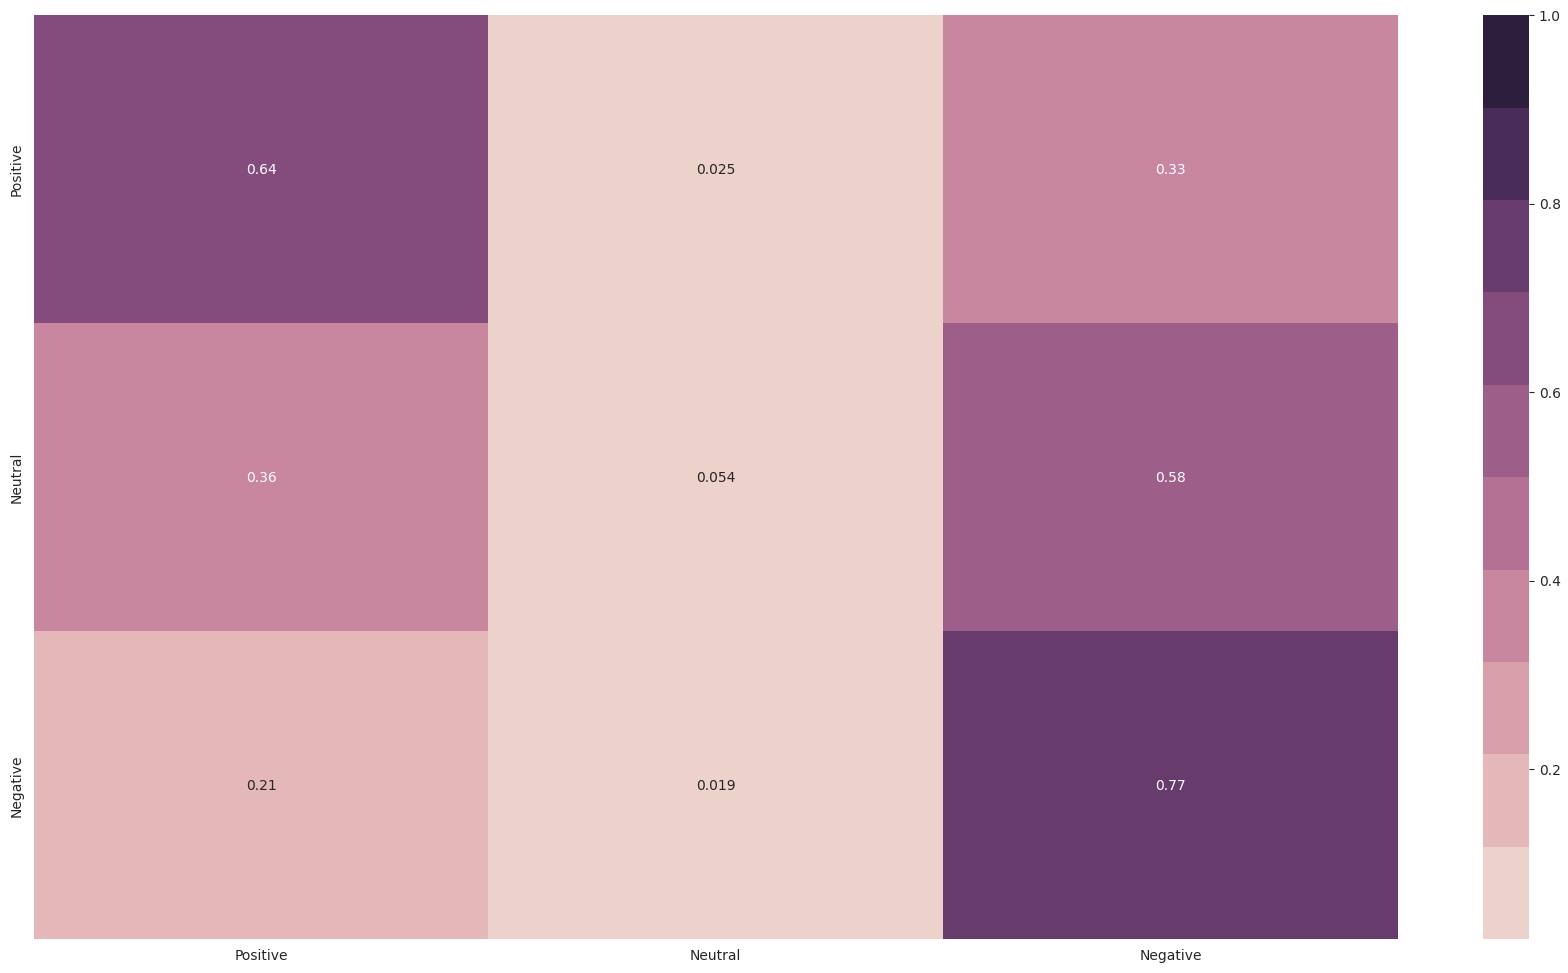

In [26]:
NBclassifer = MultinomialNB()
NBclassifer.fit(X_train, y_train)
y_pred = NBclassifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)


# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()
  

In [27]:
NBclassifer.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': 'warn'}

# Support Vector Machine

In [28]:
from sklearn.svm import SVC


Test set accuracy 0.6017868538608807
              precision    recall  f1-score   support

    Positive       0.62      0.71      0.66       590
     Neutral       0.48      0.20      0.28       354
    Negative       0.61      0.73      0.66       623

    accuracy                           0.60      1567
   macro avg       0.57      0.55      0.54      1567
weighted avg       0.58      0.60      0.58      1567



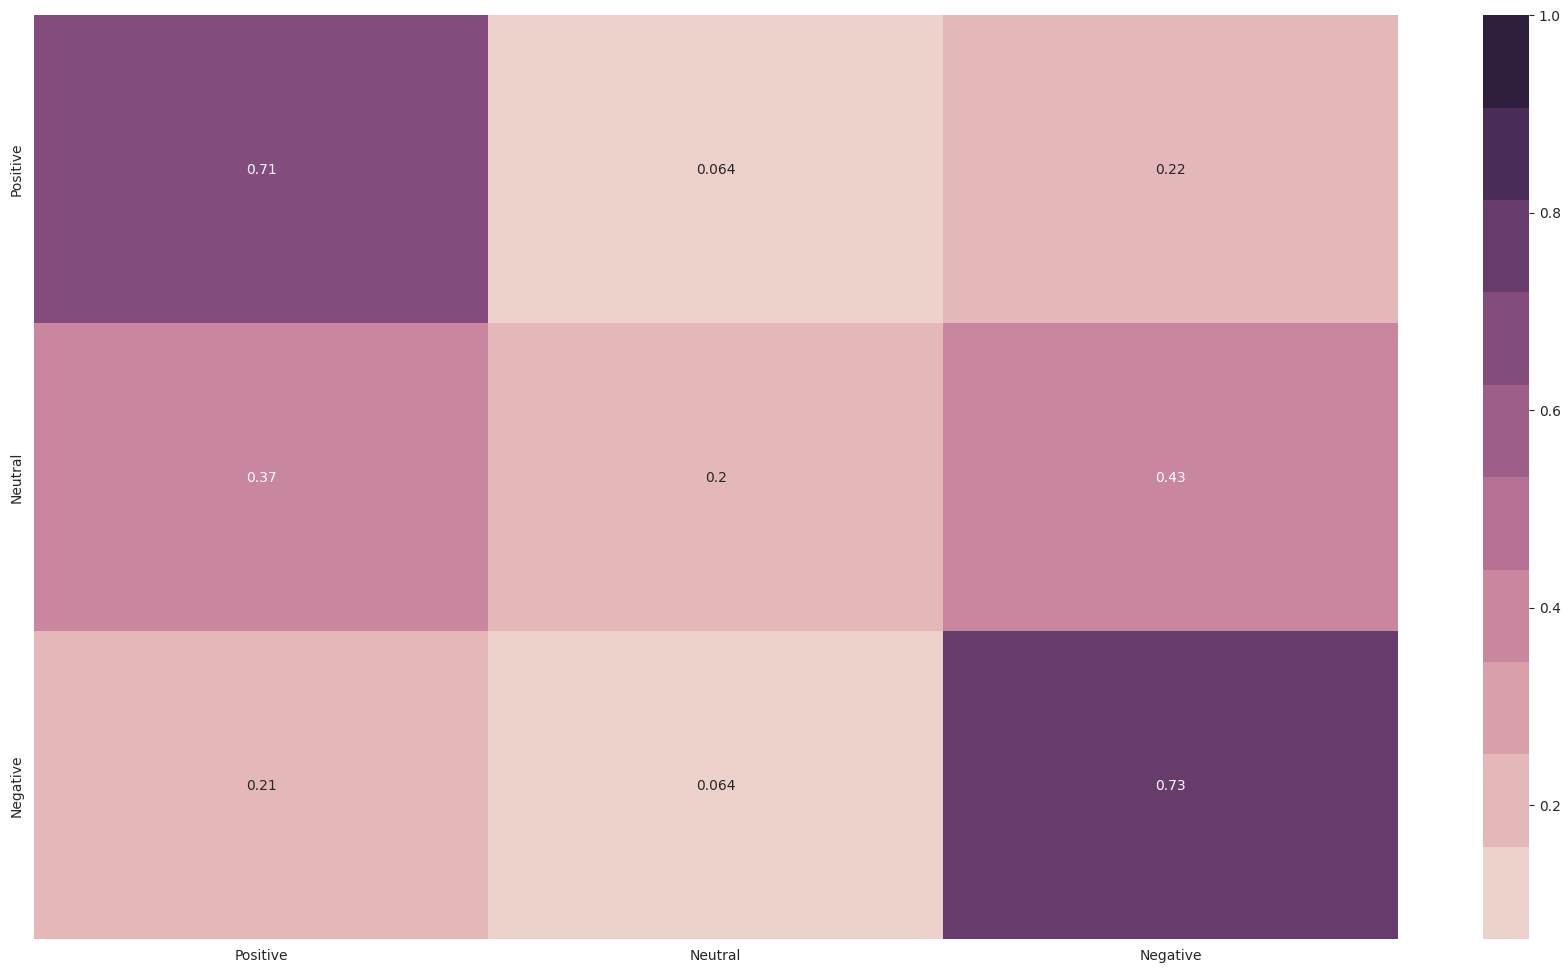

In [29]:
SVMclassifer = SVC()
SVMclassifer.fit(X_train, y_train)
y_pred = SVMclassifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()

# XGBoost

In [30]:
from xgboost import XGBClassifier

Test set accuracy 0.5788130185067007
              precision    recall  f1-score   support

    Positive       0.59      0.72      0.65       590
     Neutral       0.40      0.19      0.25       354
    Negative       0.61      0.67      0.64       623

    accuracy                           0.58      1567
   macro avg       0.53      0.52      0.51      1567
weighted avg       0.56      0.58      0.56      1567



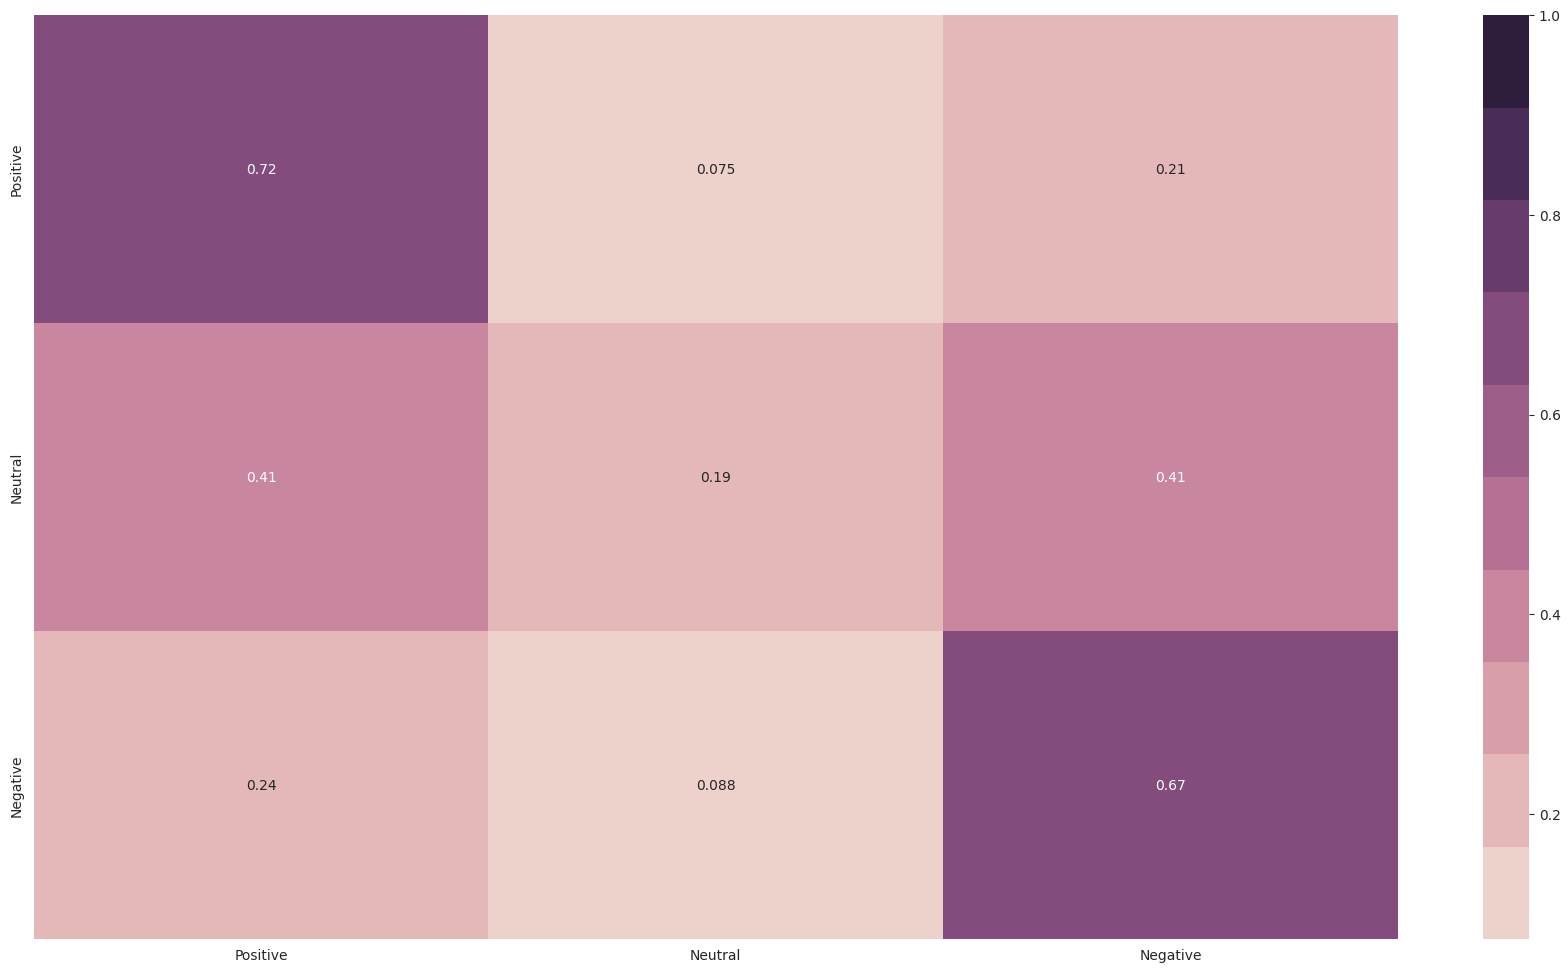

In [31]:
XGBclassifer = XGBClassifier()
XGBclassifer.fit(X_train, y_train)
y_pred = XGBclassifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()


# Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

Test set accuracy 0.6190172303765157
              precision    recall  f1-score   support

    Positive       0.65      0.70      0.67       590
     Neutral       0.50      0.26      0.34       354
    Negative       0.62      0.75      0.68       623

    accuracy                           0.62      1567
   macro avg       0.59      0.57      0.56      1567
weighted avg       0.60      0.62      0.60      1567



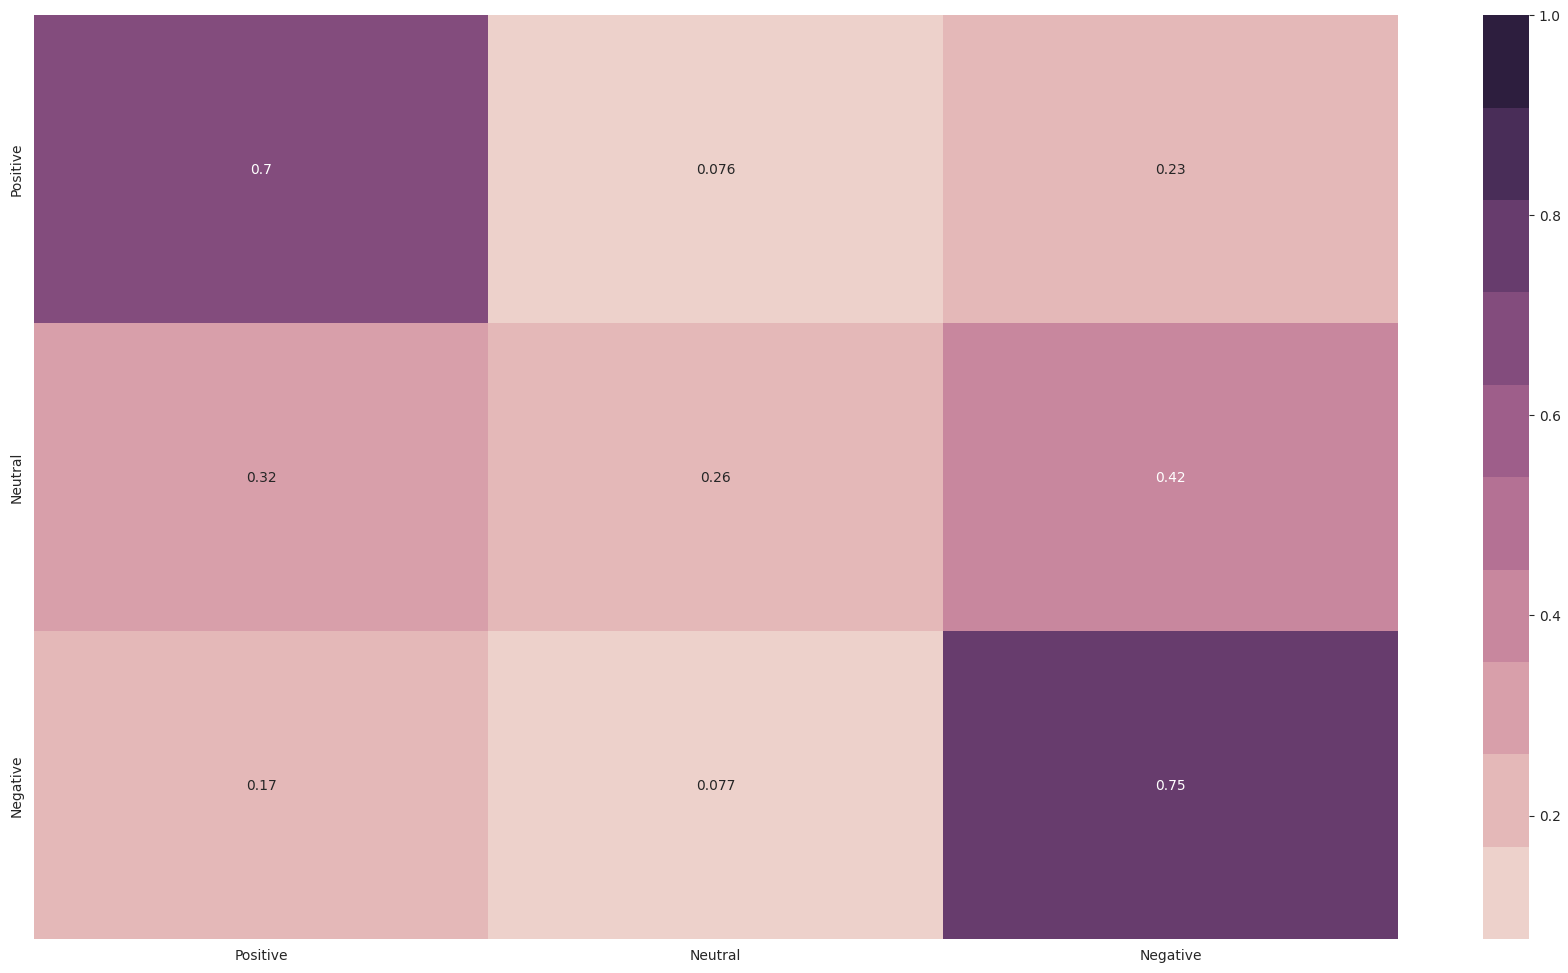

In [33]:
RFclassifer = RandomForestClassifier()
shapas = RFclassifer.fit(X_train, y_train)
y_pred = RFclassifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()
  